In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
Path = r"C://Users//NAVYA//Desktop//MY_PYTHON_PRACTICE//all_data_sets//credit_risk_dataset.csv"
df = pd.read_csv(Path)
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
df.shape

(32581, 12)

## Checking Duplicates

In [5]:
dup = df.duplicated()

In [6]:
dup.value_counts()

False    32416
True       165
dtype: int64

## Droping Duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(32416, 12)

## Checking and filling null values

In [9]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
print(df['person_emp_length'].median())
print(df['loan_int_rate'].median())

4.0
10.99


In [11]:
df['person_emp_length'] = df['person_emp_length'].replace(np.nan,df['person_emp_length'].median())
df['loan_int_rate'] = df['loan_int_rate'].replace(np.nan,df['loan_int_rate'].median())

In [12]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# **Outliers Treatment**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [14]:
def viz(x):
    if df[x].dtype == 'float64' or df[x].dtype=='int64':
        df[x].plot(kind='box')
        plt.show()

person_age


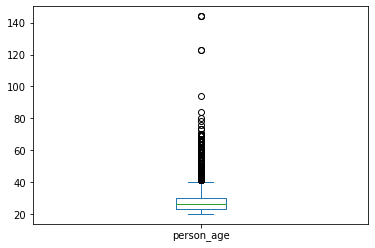

In [15]:
print('person_age')
viz('person_age')

In [16]:
# Capping the values below 100
df = df[df["person_age"]<=80]

In [17]:
print(df['person_age'].max()) 
print(df['person_age'].min())

80
20


In [18]:
len(df['person_age'])

32409

person_income


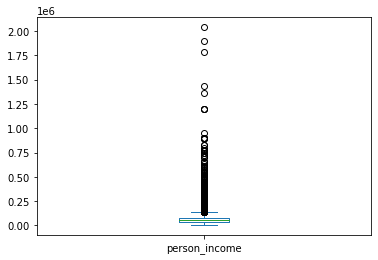

In [19]:
print('person_income')
viz('person_income')

In [20]:
df = df[df['person_income']<=100000]

In [21]:
len(df['person_income'])

28221

loan_int_rate


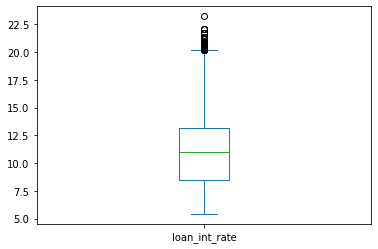

In [22]:
# Loan Int Rate Feature
print('loan_int_rate')
viz('loan_int_rate')

In [23]:
df = df[df['loan_int_rate']<=22.5]

In [24]:
len(df['loan_int_rate'])

28220

person_emp_length


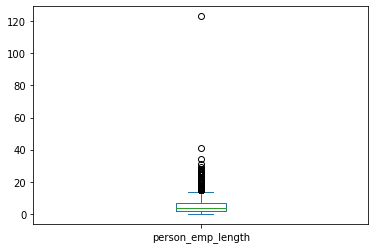

In [25]:
print('person_emp_length')
viz('person_emp_length')

In [26]:
df = df[df['person_emp_length']<40]

In [27]:
len(df['person_emp_length'])

28218

loan_amnt


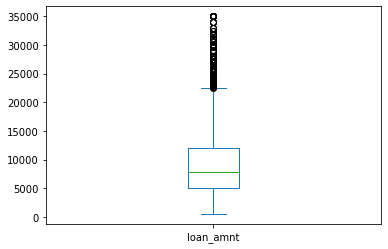

In [28]:
print('loan_amnt')
viz('loan_amnt')

loan_percent_income


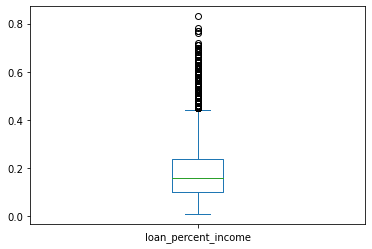

In [29]:
print('loan_percent_income')
viz('loan_percent_income')

In [30]:
df = df[df['loan_percent_income']<=0.75]

In [31]:
len(df['loan_percent_income'])

28213

In [32]:
print(df.shape)

(28213, 12)


In [33]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


## **Exploratory Data Analysis**
**Univariate Analysis**

Analysing on person_age Feature

minimum Value: 20
maximum Value: 80
mean Value: 27.491688228830682
median Value: 26.0
std Value: 6.117519928954706


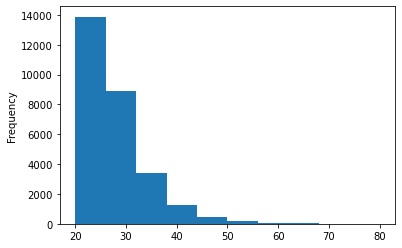

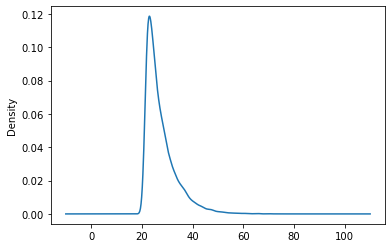

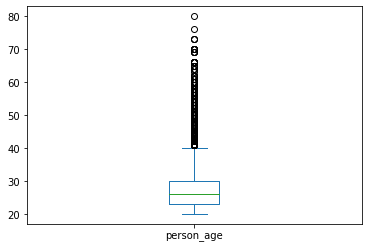

In [34]:
def viz(x):
    if df[x].dtype == 'float64' or df[x].dtype== 'int64':
        print("minimum Value:",df[x].min())
        print("maximum Value:",df[x].max())
        print("mean Value:",df[x].mean())
        print("median Value:",df[x].median())
        print("std Value:",df[x].std())
        df[x].plot(kind='hist')
        plt.show()
        df[x].plot(kind='kde')
        plt.show()
        df[x].plot(kind='box')
        plt.show()


viz('person_age')

**Analysing on person_income Feature**

minimum Value: 4000
maximum Value: 100000
mean Value: 53045.5505263531
median Value: 50400.0
std Value: 21226.27473439821


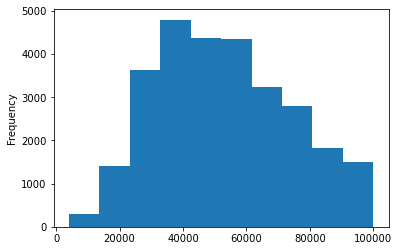

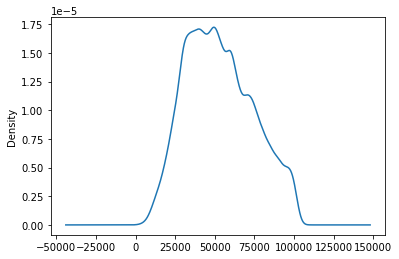

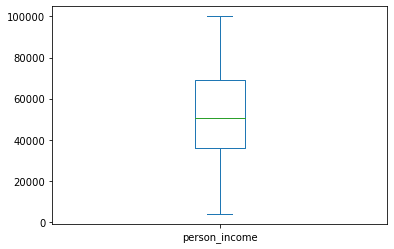

In [35]:
viz('person_income')

**Analysing person_emp_length Feature**

minimum Value: 0.0
maximum Value: 34.0
mean Value: 4.578031403962712
median Value: 4.0
std Value: 3.8314548433527937


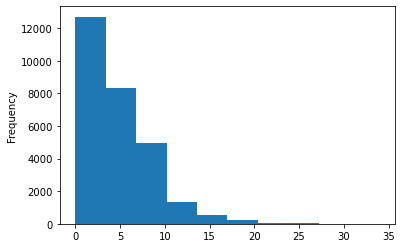

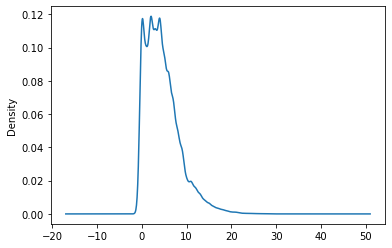

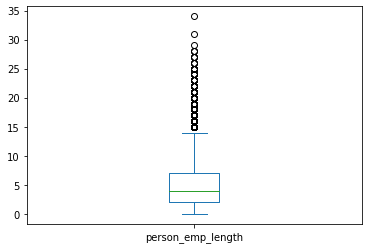

In [36]:
viz('person_emp_length')

**Analysing on loan_amnt Feature**

minimum Value: 500
maximum Value: 35000
mean Value: 8896.491865452097
median Value: 7750.0
std Value: 5711.516005158047


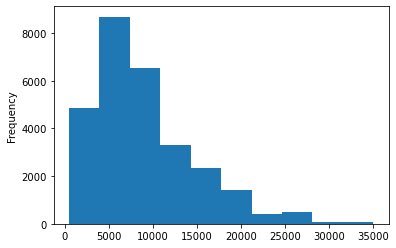

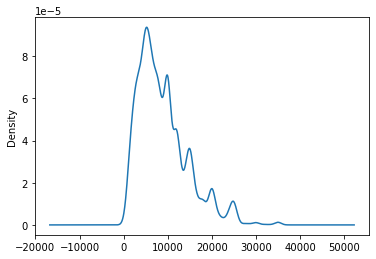

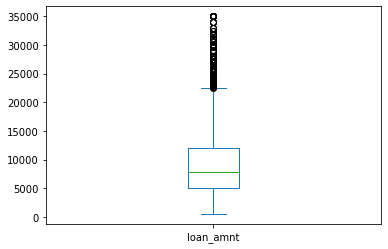

In [37]:
viz('loan_amnt')

**Analysing loan_percent_income**

minimum Value: 0.01
maximum Value: 0.72
mean Value: 0.1800301279552014
median Value: 0.16
std Value: 0.10821487504118958


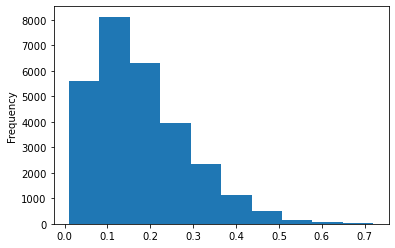

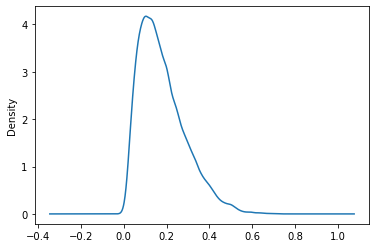

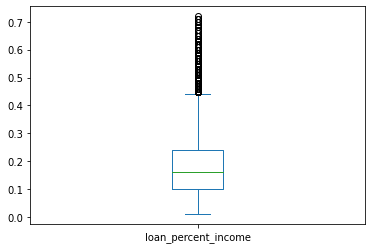

In [38]:
viz('loan_percent_income')

**Analysis on cb_person_cred_hist_length**

minimum Value: 2
maximum Value: 30
mean Value: 5.683160245277
median Value: 4.0
std Value: 4.005139763891362


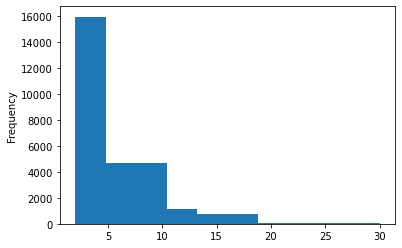

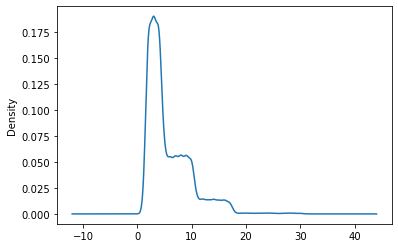

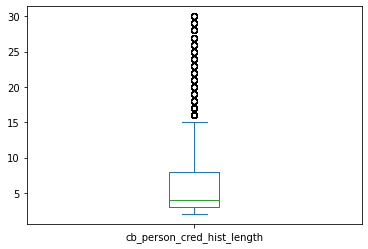

In [39]:
viz('cb_person_cred_hist_length')

**Analysisi on loan_int_rate column**

minimum Value: 5.42
maximum Value: 22.11
mean Value: 11.005191223902932
median Value: 10.99
std Value: 3.0722668289882606


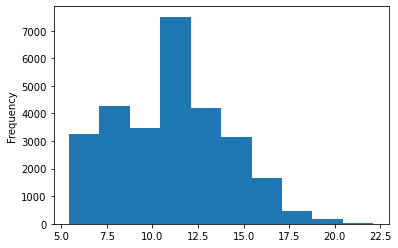

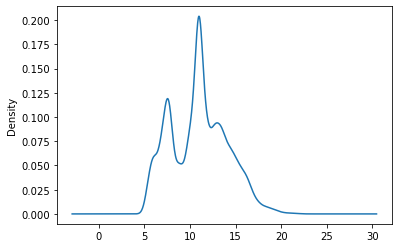

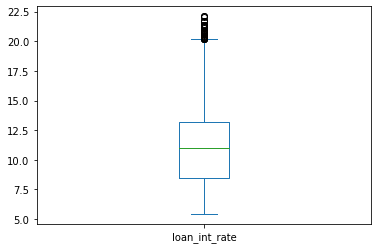

In [40]:
viz('loan_int_rate')

**Analysis on Person_home_ownership**

In [41]:
df['person_home_ownership'].value_counts()

RENT        15303
MORTGAGE    10509
OWN          2309
OTHER          92
Name: person_home_ownership, dtype: int64

<AxesSubplot:ylabel='person_home_ownership'>

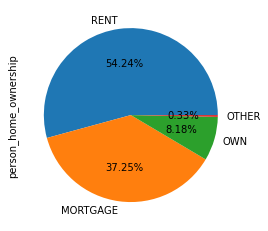

In [42]:
round(df['person_home_ownership'].value_counts(normalize=True) * 100, 2).plot.pie(autopct='%.2f%%')

**Analysis on loan_intent**

In [43]:
df['loan_intent'].value_counts()

EDUCATION            5643
MEDICAL              5413
VENTURE              4921
PERSONAL             4782
DEBTCONSOLIDATION    4487
HOMEIMPROVEMENT      2967
Name: loan_intent, dtype: int64

<AxesSubplot:xlabel='loan_intent', ylabel='Count'>

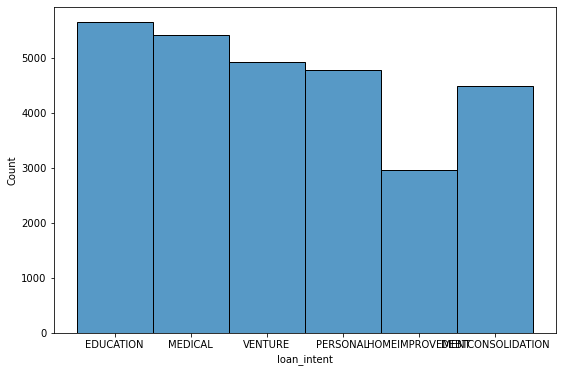

In [44]:
plt.figure(figsize=(9,6))
sns.histplot(x ='loan_intent', data = df)

**Analysis on loan_grade**

In [45]:
df['loan_grade'].value_counts()

A    9307
B    9005
C    5683
D    3171
E     806
F     195
G      46
Name: loan_grade, dtype: int64

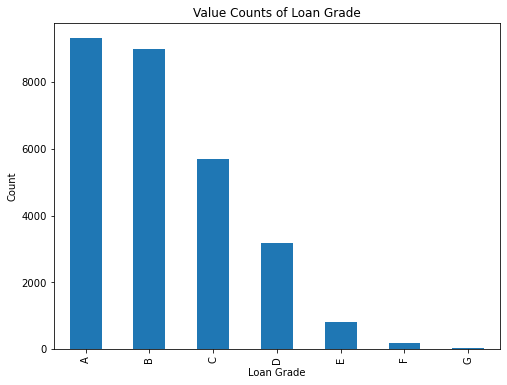

In [46]:
plt.figure(figsize=(8, 6))
df['loan_grade'].value_counts().plot(kind='bar')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Value Counts of Loan Grade')
plt.show()

**Analysis on cb_person_cred_hist_length feature**

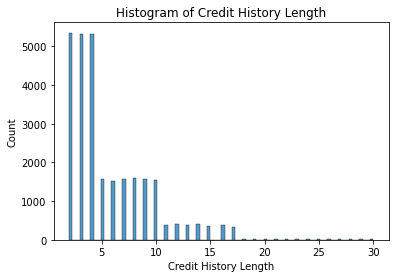

In [47]:
sns.histplot(df['cb_person_cred_hist_length'], kde=False)
plt.xlabel('Credit History Length')
plt.ylabel('Count')
plt.title('Histogram of Credit History Length')
plt.show()

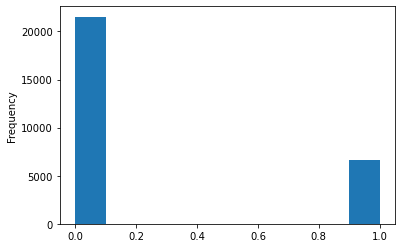

In [48]:
df['loan_status'].plot(kind='hist')

plt.show()

**Analysis on Person_default_on_file column**



In [49]:
df['cb_person_default_on_file'].value_counts()

N    23223
Y     4990
Name: cb_person_default_on_file, dtype: int64

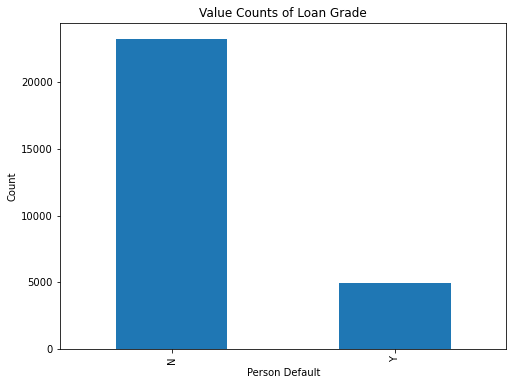

In [50]:
plt.figure(figsize=(8, 6))
df['cb_person_default_on_file'].value_counts().plot(kind='bar')
plt.xlabel('Person Default')
plt.ylabel('Count')
plt.title('Value Counts of Loan Grade')
plt.show()

**Analysis on Loan_status**

<AxesSubplot:ylabel='loan_status'>

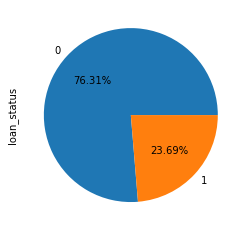

In [51]:
round(df['loan_status'].value_counts(normalize=True) * 100, 2).plot.pie(autopct='%.2f%%')

## **Bivariate Analysis**


In [52]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(exclude='number')

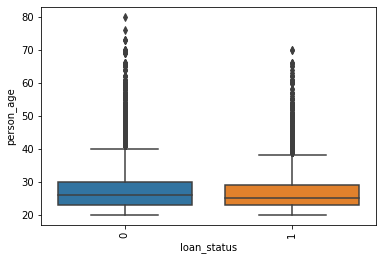

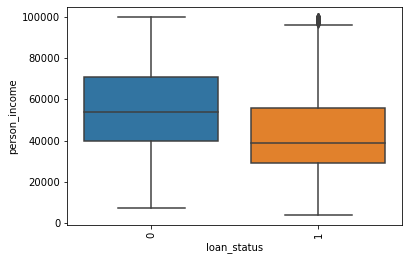

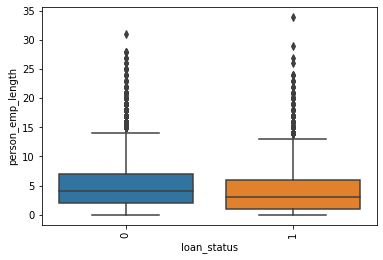

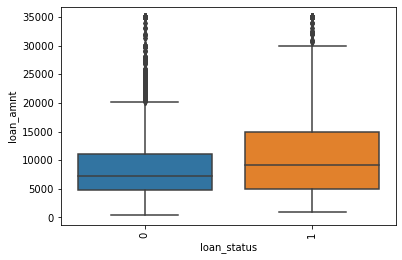

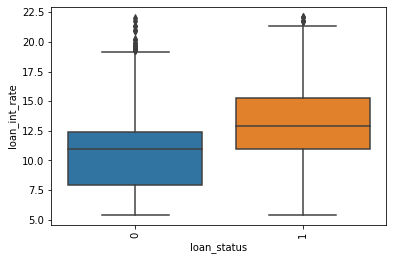

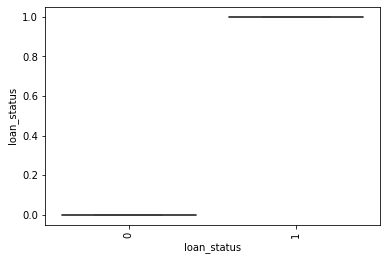

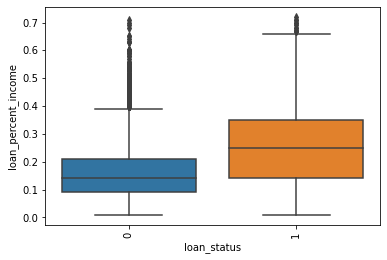

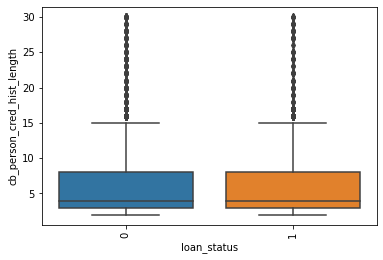

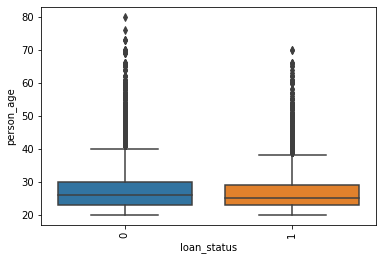

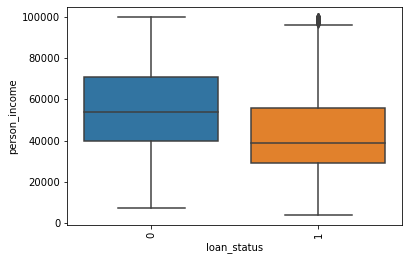

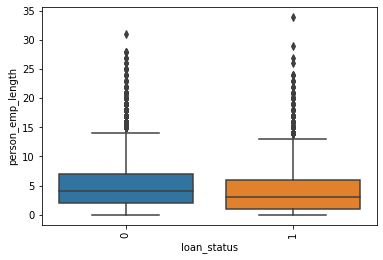

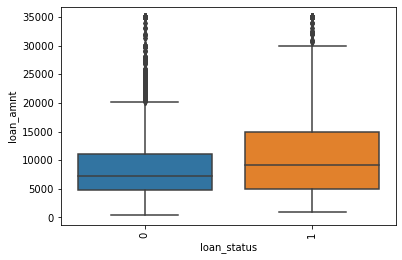

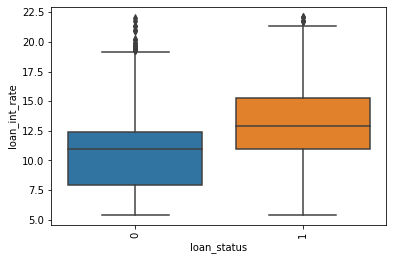

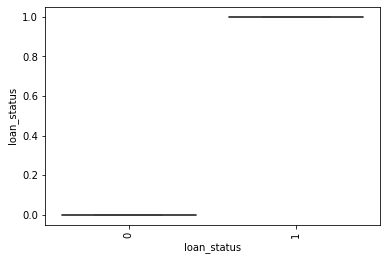

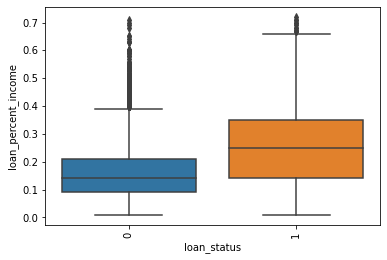

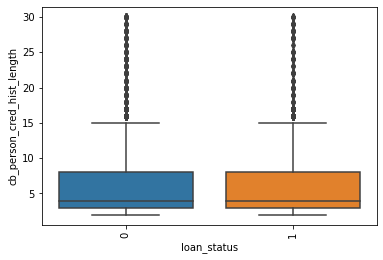

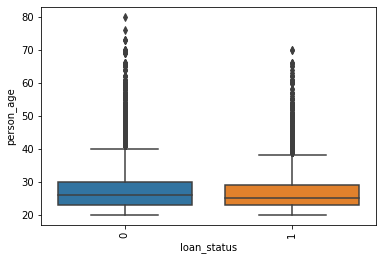

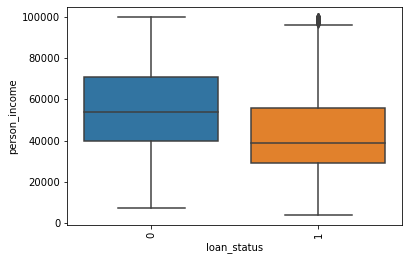

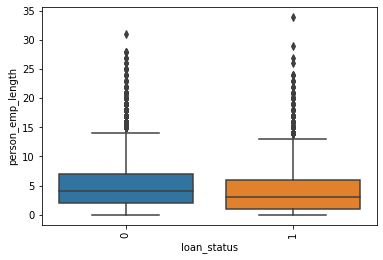

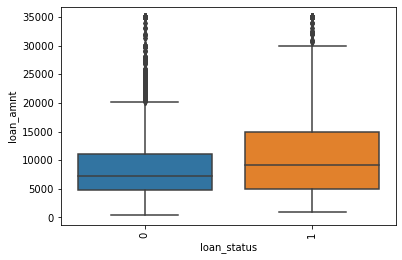

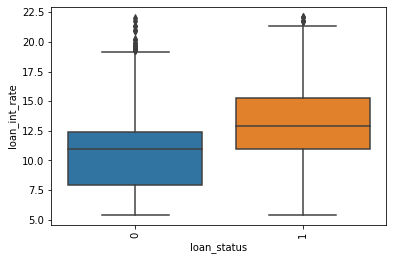

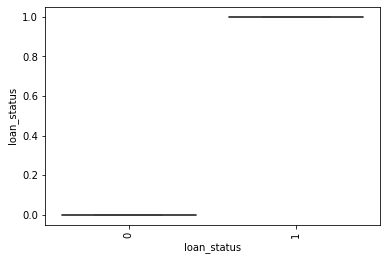

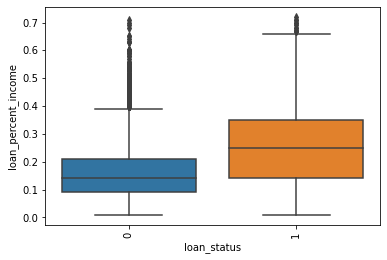

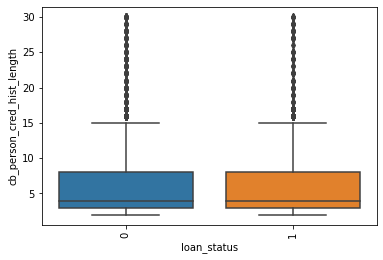

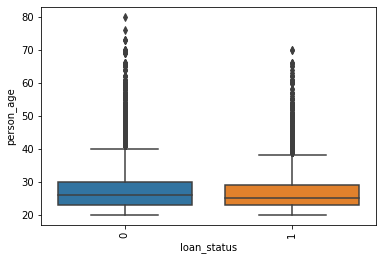

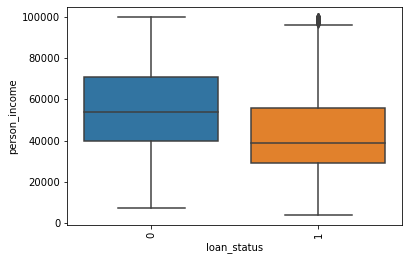

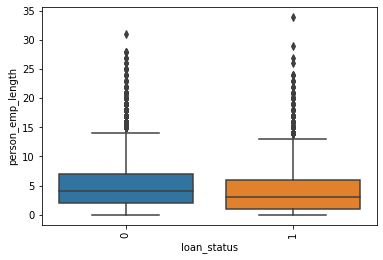

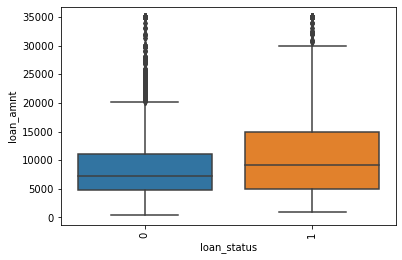

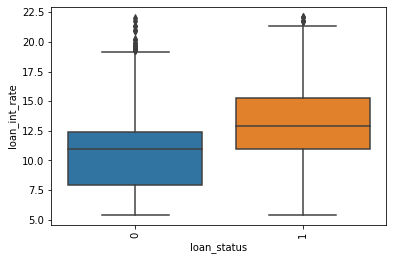

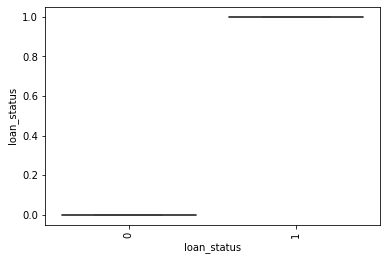

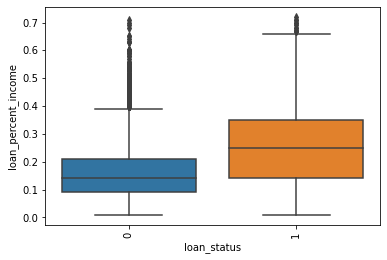

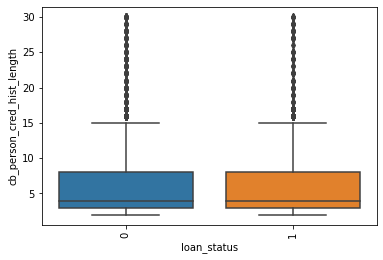

In [53]:
for i in cat:
    for j in num:
        sns.boxplot(x=df['loan_status'],y=df[j],data=df)
        plt.xticks(rotation=90)
        plt.show()

## Relationship between Target Variable(Loan Status) and person_age

In [54]:
df1=pd.crosstab(df['person_age'],df['loan_status'])

<AxesSubplot:xlabel='person_age'>

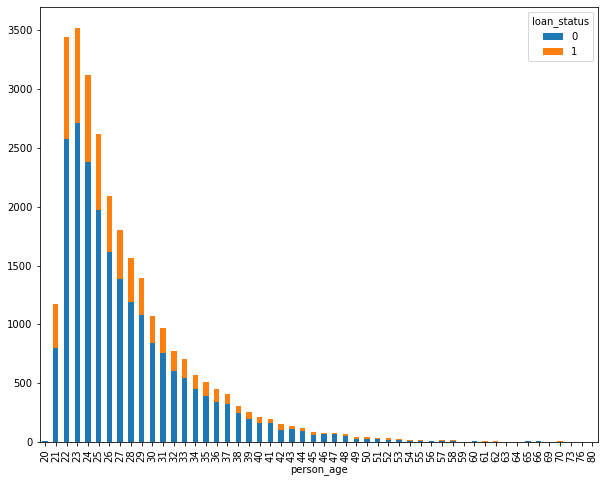

In [55]:
df1.plot(kind='bar',stacked=True,figsize=(10,8))

## Loan status and persons income

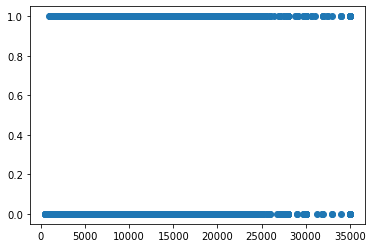

In [56]:
plt.scatter(x = df['loan_amnt'],y = df['loan_status'])

## Relationship between Target Variable(Loan Status) and person_emp_length

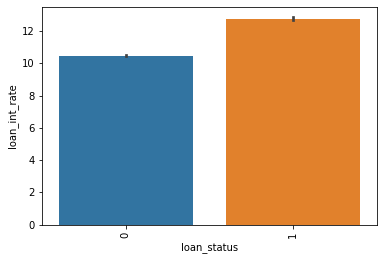

In [57]:
sns.barplot(x='loan_status',y="loan_int_rate",data=df)
plt.title("")
plt.ylabel("loan_int_rate")
plt.xlabel("loan_status")
plt.xticks(rotation=90)
plt.show()

## Relationship between Target Variable(Loan Status) and loan_amnt

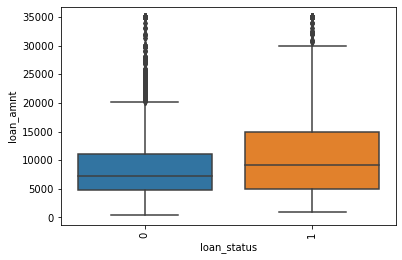

In [58]:
sns.boxplot(x='loan_status',y="loan_amnt",data=df)
plt.title("")
plt.ylabel("loan_amnt")
plt.xlabel("loan_status")
plt.xticks(rotation=90)
plt.show()

## Relationship between Target Variable(Loan Status) and loan_int_rate

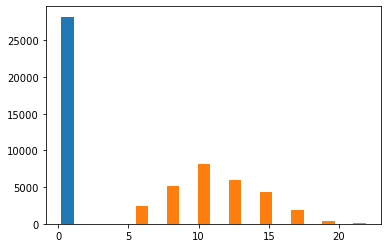

In [59]:
plt.hist([df['loan_status'], df['loan_int_rate']])
plt.show()

## Relationship between Target Variable(Loan Status) and loan_percent_income

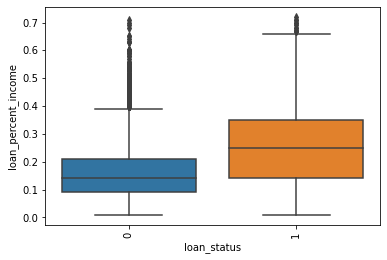

In [60]:
sns.boxplot(x='loan_status',y="loan_percent_income",data=df)
plt.title("")
plt.ylabel("loan_percent_income")
plt.xlabel("loan_status")
plt.xticks(rotation=90)
plt.show()

## Relationship between Target Variable(Loan Status) and loan_intent

In [61]:
df1=pd.crosstab(df['loan_intent'],df['loan_status'])
df1

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3123,1364
EDUCATION,4594,1049
HOMEIMPROVEMENT,2090,877
MEDICAL,3870,1543
PERSONAL,3743,1039
VENTURE,4110,811


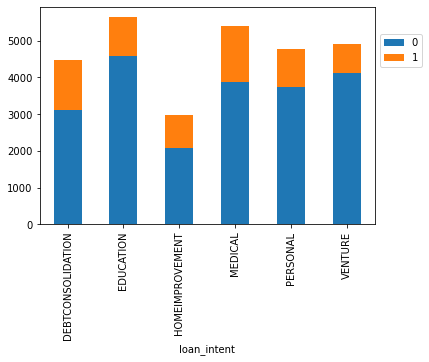

In [62]:
df1.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1,.9))
plt.show()

# Relationship between Target Variable(Loan Status) and loan_grade

In [63]:
df2=pd.crosstab(df['loan_grade'],df['loan_status'])
df2

loan_status,0,1
loan_grade,,
A,8260,1047
B,7367,1638
C,4388,1295
D,1212,1959
E,251,555
F,51,144
G,1,45


<AxesSubplot:xlabel='loan_grade'>

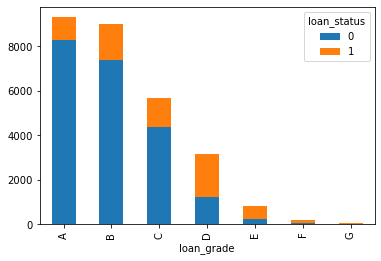

In [64]:
df2.plot(kind='bar',stacked=True)

In [65]:
df3=pd.crosstab(df['cb_person_cred_hist_length'],df['loan_status'])
df3

loan_status,0,1
cb_person_cred_hist_length,,
2,3998,1353
3,4033,1280
4,4035,1279
5,1227,352
6,1180,348
7,1224,340
8,1211,374
9,1222,356
10,1193,345


<AxesSubplot:xlabel='cb_person_cred_hist_length'>

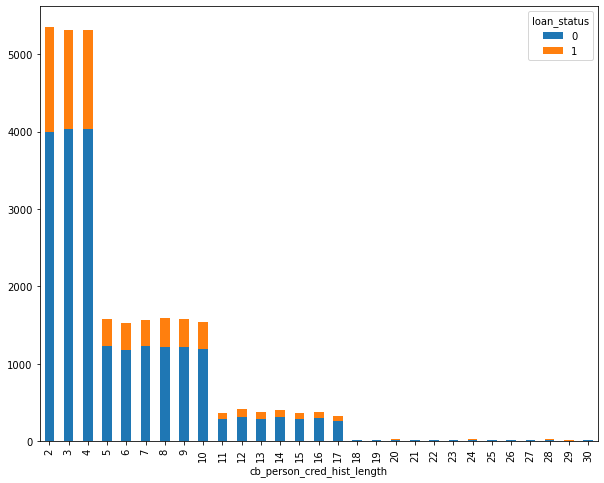

In [66]:

df3.plot(kind='bar',stacked=True,figsize=(10,8))

In [67]:
df4=pd.crosstab(df['person_home_ownership'],df['loan_status'])
df4

loan_status,0,1
person_home_ownership,,
MORTGAGE,9060,1449
OTHER,60,32
OWN,2121,188
RENT,10289,5014


<AxesSubplot:xlabel='person_home_ownership'>

<Figure size 2160x1440 with 0 Axes>

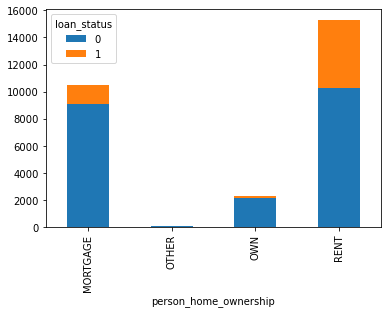

In [68]:
plt.figure(figsize=(30,20))
df4.plot(kind='bar',stacked=True)

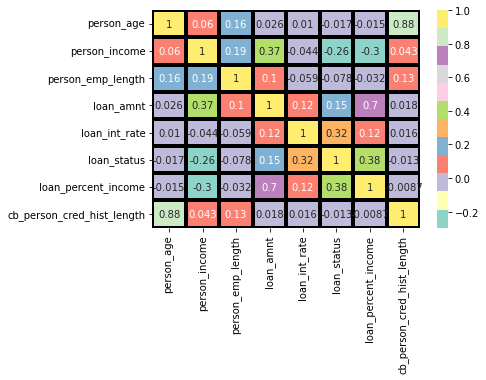

In [69]:
sns.heatmap(df.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)
plt.show();


#### **Observation:**
-- By using above plot,We can conclude that how strong relationship is between the Numerical Features.      
-- From the Numerical Features there is a strong correlation between Loan_percent_income and loan_status.

## **Insights and Conclusions:**  

`Loan Status Distribution:`
-  The dataset contains information about defaulted and non-defaulted loans.    
-  We need to examine the factors that contribute to loan defaults and provide recommendations to minimize the default rate.

`Age:`
-  Younger borrowers may have higher default rates.    
-  The bank can consider setting age for loan approval to mitigate default risks.

`Employment Length:`
-  Those People with longer employment histories may be more reliable for Loan Approval.    
-  The bank can consider setting employment length criteria for loan approval to mitigate default risks.   

`Income and Loan Amount:`   
- Analyzing the income and loan amount relationship can help us understand borrowers' financial capability.      
- A higher loan amount relative to income may increase the likelihood of default.     
- It is crucial to assess borrowers' ability to repay the loan by considering income-to-loan ratios and setting appropriate limits.

`Interest Rate and Loan Grade:`
- Loan grade and interest rate are important indicators of risk.     
- Higher-grade loans with lower interest rates are more likely to be repaid.    
- The bank should evaluate the creditworthiness of borrowers and assign appropriate loan grades to minimize default risks.  

`Home Ownership and Loan Intent:`
- We should explore the relationship between home ownership, loan intent, and loan status.        
- Borrowers who own homes may have a more stable financial situation, potentially reducing default rates.    
- The purpose of the loan (loan intent) should also be considered, as certain intents may carry higher risks of default.    

`Credit History:`
- Longer credit history is generally associated with lower default rates.     
- The bank should consider the length of the borrower's credit history when assessing loan applications.   

## **Recommendations:**  

To minimize the risk of loan defaults and improve the bank's loan portfolio performance, here are some recommendations:

1) Set stricter criteria for loan approval, considering factors like age and employment length. This helps ensure more reliable borrowers.      
2) Conduct a thorough evaluation of borrowers' income to make sure that the loan amounts granted are reasonable based on their income levels.      
3) Carefully assess borrowers' creditworthiness and determine appropriate loan grades and interest rates. This helps reduce the chances of defaults.      
4) Take into account whether borrowers own a home as an additional factor when evaluating loan applications. Homeowners generally demonstrate more financial stability.      
5) Analyze the purpose of the loan (loan intent) to identify high-risk purposes. Adjust lending strategies accordingly to mitigate potential defaults.      
6) Prioritize borrowers with longer credit histories since they tend to have lower default rates.     

Implementing these recommendations will enable the bank to minimize the risk of loan defaults and enhance the overall performance of its loan portfolio. However, it is important to validate these findings with more extensive analysis on a larger and representative dataset to ensure the accuracy of the insights and recommendations.    

# SPRINT-2

# Data Preparation and Modelling

### step-1. Load the data

In [70]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [71]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### step-2.Identifying the inputs(X) and output(y)

In [72]:
X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

y = df['loan_status']

#### Identify the type of ML Task:
**Alg:** Supervised     
**Task:** Classification 

### Step-3.Split the dataset into Training and Testing (recommended 75:25 split)

In [73]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)


print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21159, 11) (21159,)
(7054, 11) (7054,)


**Splitting the Numerical and Categorical features from the train data**

In [74]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [75]:
# Splitted Numerical Features
X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25139,28,80000,1.0,3100,7.05,0.04,9
20737,27,36082,5.0,5000,6.62,0.14,9
8404,23,57600,6.0,4000,5.42,0.07,2
31234,42,82000,13.0,26800,10.99,0.33,15
1160,21,49000,2.0,16950,18.25,0.35,4


In [76]:
# Splitted Categorical Features
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
25139,MORTGAGE,PERSONAL,A,N
20737,MORTGAGE,EDUCATION,A,N
8404,MORTGAGE,DEBTCONSOLIDATION,A,N
31234,MORTGAGE,HOMEIMPROVEMENT,E,Y
1160,RENT,PERSONAL,D,Y


In [77]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [78]:
# Categorical (Ordinal) Features
X_train_cat_ord = X_train_cat[['loan_grade']]  
X_train_cat_ord = pd.DataFrame(X_train_cat_ord, columns=['loan_grade']) 

X_train_cat_ord.head()

,loan_grade
25139,A
20737,A
8404,A
31234,E
1160,D


In [79]:
# Categorical (Nominal) Features
X_train_cat_nomi = X_train_cat[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]

X_train_cat_nomi.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
25139,MORTGAGE,PERSONAL,N
20737,MORTGAGE,EDUCATION,N
8404,MORTGAGE,DEBTCONSOLIDATION,N
31234,MORTGAGE,HOMEIMPROVEMENT,Y
1160,RENT,PERSONAL,Y


### Step - 4: Data preparation on train data:

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                         columns= X_train_num.columns,
                                         index = X_train_num.index)
X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25139,0.088581,1.275702,-0.937481,-1.018721,-1.286718,-1.292607,0.832024
20737,-0.075786,-0.799106,0.108413,-0.684614,-1.426807,-0.371620,0.832024
8404,-0.733255,0.217464,0.369886,-0.860460,-1.817755,-1.016311,-0.919150
31234,2.389722,1.370187,2.200199,3.148828,-0.003106,1.378255,2.333031
1160,-1.061990,-0.188824,-0.676007,1.416745,2.362128,1.562452,-0.418814


In [81]:
X_train_num.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000
mean,27.461080,52996.889551,4.585377,8893.258188,10.999534,0.180350,5.674134
std,6.084082,21167.764137,3.824572,5686.931002,3.069536,0.108582,3.997412
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.000000,36000.000000,2.000000,5000.000000,8.490000,0.100000,3.000000
50%,26.000000,50400.000000,4.000000,7725.000000,10.990000,0.160000,4.000000
75%,30.000000,69000.000000,7.000000,12000.000000,13.110000,0.240000,8.000000
max,80.000000,100000.000000,31.000000,35000.000000,22.110000,0.720000,30.000000


In [82]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.74610804e+01 5.29968896e+04 4.58537738e+00 8.89325819e+03
 1.09995340e+01 1.80350206e-01 5.67413394e+00]
Std of each column: [6.08393836e+00 2.11672639e+04 3.82448177e+00 5.68679661e+03
 3.06946390e+00 1.08579176e-01 3.99731793e+00]


**LabelEncoding for Categorical(Ordinal) Feature**

In [83]:
# Dataframe for labelencoding feature
X_train_cat_LabelEnc = pd.DataFrame(index=X_train_cat_ord.index)

X_train_cat_LabelEnc.head()

""
25139
20737
8404
31234
1160


In [84]:
X_train_cat_ord.loan_grade.unique()

array(['A', 'E', 'D', 'B', 'C', 'F', 'G'], dtype=object)

In [85]:
# Label Encoding
cut_encoder = {'A':7, 'E':6, 'D':5, 'B':4, 'C':3, 'F':2, 'G':1}

X_train_cat_LabelEnc['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_train_cat_LabelEnc.head()

,loan_grade
25139,7
20737,7
8404,7
31234,6
1160,5


**OneHot Encoding for Categorical Features**

In [86]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# Creating dataframe as columns will be in array format after OneHot Encoding
X_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(X_train_cat_nomi), 
                               columns=encoder.get_feature_names_out(X_train_cat_nomi.columns), 
                               index = X_train_cat_nomi.index)

X_train_cat_OneEnc.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
25139,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1160,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


**Concatinating categorical Features(Ordinal and Nominal) and Numerical Features**

In [87]:
X_train_cat_rescaled = pd.concat([X_train_cat_OneEnc,X_train_cat_LabelEnc], axis=1)


**Concatinating categorical and Numerical Features**

In [88]:
X_train_transformed = pd.concat([X_train_cat_rescaled,X_train_num_rescaled],axis = 1)

X_train_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
25139,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.088581,1.275702,-0.937481,-1.018721,-1.286718,-1.292607,0.832024
20737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,-0.075786,-0.799106,0.108413,-0.684614,-1.426807,-0.371620,0.832024
8404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-0.733255,0.217464,0.369886,-0.860460,-1.817755,-1.016311,-0.919150
31234,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6,2.389722,1.370187,2.200199,3.148828,-0.003106,1.378255,2.333031
1160,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5,-1.061990,-0.188824,-0.676007,1.416745,2.362128,1.562452,-0.418814


### Step - 5: Data preparation on test data:

In [89]:
# Splitted Test data
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
5148,25,44000,MORTGAGE,2.0,VENTURE,D,12000,14.54,0.27,N,2
8834,24,42000,RENT,2.0,EDUCATION,B,8000,10.99,0.19,N,4
19145,27,30000,RENT,4.0,MEDICAL,D,2400,17.49,0.08,Y,10
28045,28,42000,RENT,3.0,EDUCATION,D,9600,14.61,0.23,N,9
5802,22,46800,MORTGAGE,4.0,MEDICAL,A,3600,7.14,0.08,N,3


In [90]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7054 entries, 5148 to 23390
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7054 non-null   int64  
 1   person_income               7054 non-null   int64  
 2   person_home_ownership       7054 non-null   object 
 3   person_emp_length           7054 non-null   float64
 4   loan_intent                 7054 non-null   object 
 5   loan_grade                  7054 non-null   object 
 6   loan_amnt                   7054 non-null   int64  
 7   loan_int_rate               7054 non-null   float64
 8   loan_percent_income         7054 non-null   float64
 9   cb_person_default_on_file   7054 non-null   object 
 10  cb_person_cred_hist_length  7054 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 661.3+ KB


In [91]:
# Numerical Features of Test Data
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5148,25,44000,2.0,12000,14.54,0.27,2
8834,24,42000,2.0,8000,10.99,0.19,4
19145,27,30000,4.0,2400,17.49,0.08,10
28045,28,42000,3.0,9600,14.61,0.23,9
5802,22,46800,4.0,3600,7.14,0.08,3


In [92]:
# Total Categorical Features
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
5148,MORTGAGE,VENTURE,D,N
8834,RENT,EDUCATION,B,N
19145,RENT,MEDICAL,D,Y
28045,RENT,EDUCATION,D,N
5802,MORTGAGE,MEDICAL,A,N


In [93]:
# Categorical(Nominal)
X_test_cat_nomi = X_test_cat[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]

X_test_cat_nomi.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
5148,MORTGAGE,VENTURE,N
8834,RENT,EDUCATION,N
19145,RENT,MEDICAL,Y
28045,RENT,EDUCATION,N
5802,MORTGAGE,MEDICAL,N


In [94]:
# Categorical(Ordinal) 
X_test_cat_ord = X_test_cat[['loan_grade']]  
X_test_cat_ord = pd.DataFrame(X_test_cat_ord, columns=['loan_grade']) 

X_test_cat_ord.head()

,loan_grade
5148,D
8834,B
19145,D
28045,D
5802,A


In [95]:
# Rescalling Numerical features
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                         columns= X_test_num.columns,
                                         index = X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5148,-0.404521,-0.425038,-0.676007,0.546308,1.153448,0.825663,-0.919150
8834,-0.568888,-0.519523,-0.676007,-0.157076,-0.003106,0.088873,-0.418814
19145,-0.075786,-1.086437,-0.153061,-1.141813,2.114528,-0.924212,1.082192
28045,0.088581,-0.519523,-0.414534,0.124278,1.176253,0.457268,0.832024
5802,-0.897623,-0.292758,-0.153061,-0.930798,-1.257397,-0.924212,-0.668982


In [96]:
# LabelEncoding Categorical(Ordinal)
X_test_cat_LabelEnc = pd.DataFrame(index=X_test_cat_ord.index)

X_test_cat_LabelEnc.head()

""
5148
8834
19145
28045
5802


In [97]:
X_test_cat_LabelEnc['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : cut_encoder[x])

X_test_cat_LabelEnc.head()

,loan_grade
5148,5
8834,4
19145,5
28045,5
5802,7


In [98]:
# One-Hot Encoding Categorical (Nominal) Features
X_test_cat_OneEnc = pd.DataFrame(encoder.transform(X_test_cat_nomi), 
                               columns=encoder.get_feature_names_out(X_test_cat_nomi.columns), 
                               index = X_test_cat_nomi.index)

X_test_cat_OneEnc.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
5148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8834,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
19145,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
28045,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
# Concatinating Ordinal and Nominal (Categorical) Features
X_test_cat_rescaled = pd.concat([X_test_cat_OneEnc,X_test_cat_LabelEnc], axis=1)

X_test_cat_rescaled.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
5148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
8834,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
19145,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5
28045,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5
5802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7


In [100]:
# Concatinating Categorical and Numerical Features
X_test_transformed = pd.concat([X_test_cat_rescaled,X_test_num_rescaled],axis = 1)

X_test_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
5148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,-0.404521,-0.425038,-0.676007,0.546308,1.153448,0.825663,-0.919150
8834,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,-0.568888,-0.519523,-0.676007,-0.157076,-0.003106,0.088873,-0.418814
19145,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5,-0.075786,-1.086437,-0.153061,-1.141813,2.114528,-0.924212,1.082192
28045,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5,0.088581,-0.519523,-0.414534,0.124278,1.176253,0.457268,0.832024
5802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,-0.897623,-0.292758,-0.153061,-0.930798,-1.257397,-0.924212,-0.668982


### Step - 6: Model Building and Predictions

**Logistic Regression**

In [101]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train_transformed,y_train)

y_test_predicted = classifier.predict(X_test_transformed)

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_predicted)

0.8474624326623192

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

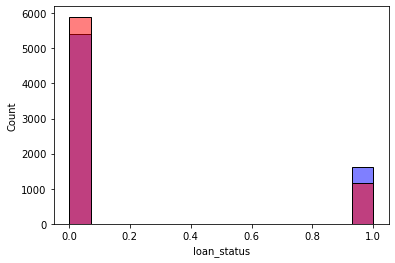

In [102]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5)

**KNN classifier**

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.8853132974199036

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

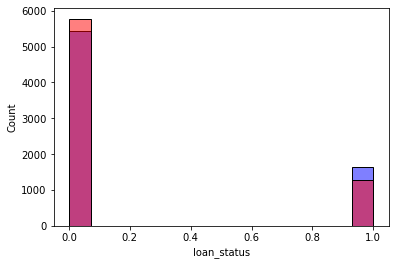

In [104]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

**Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_predicted = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_predicted) 

0.8848880068046499

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

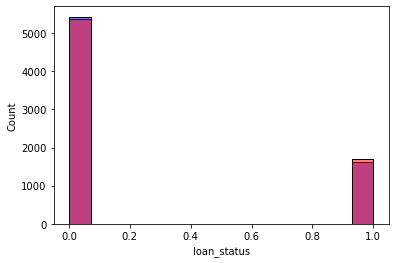

In [106]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5)

**Random Forest Classifier**

In [107]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9333711369435781

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

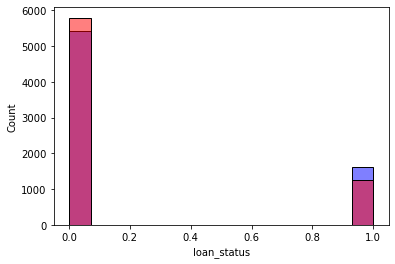

In [108]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

**Support Vector Classifier**

In [109]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)



y_test_predicted = classifier.predict(X_test_transformed)


metrics.accuracy_score(y_test, y_test_predicted)

0.8943861638786504

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

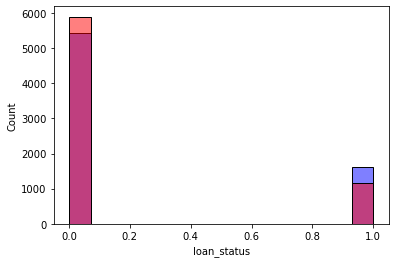

In [110]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5)

**CONCLUSION:**     
-- Random Forest Algorithm is the best model to predict the  `Credit Risk Scoring.`